### Importing library

In [2]:
from DatasetWiz.loader import DataLoader
from DatasetWiz.model import CustomModel
from DatasetWiz.visualizer import FeatureSpaceVisualizer
from DatasetWiz.metrics import Metrics
from DatasetWiz.evaluation import ModelEvaluator

C:\Users\hdn7rng\.conda\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Setting up pipeline

Example notebook for testing the effects of class imbalances on metrics and feature spaces. 

### Importing datasets

#### Make imbalances
Here we use the  PEG dataset as an example. We first set the imbalance percentages in an array that we want to create in the dataset. We also select the class index 0 which belongs to the NOK class. We then create instances of DataLoader for each of the imbalanced datasets and load them into the 'loaders' dictionary for later use

In [3]:
# List of  percentages you want to remove from class
imbalance_percentages = [1, 0.7, 0.5, 0.3, 0.2]  # Add more percentages as needed
class_index_to_delete = 0
loaders = {}

# Iterate through imbalance percentages and create DataLoader objects
for imbalance_percentage in imbalance_percentages:
    # Create a new DataLoader object for each percentage
    loader_copy = DataLoader(f"C:/Users/hdn7rng/Desktop/Experiments/datasets/PEG")
    
    # Apply calss imabalance to the new DataLoader object
    loader_copy.create_class_imbalance( imbalance_percentage = imbalance_percentage, class_index = class_index_to_delete) 
    
    # Append the new DataLoader object to the list
    loaders[loader_copy] = []


Found 1000 files belonging to 2 classes.
num samples to keep 504
len of new labels  1000 [0 1]
Found 1000 files belonging to 2 classes.
num samples to keep 352
len of new labels  848 [0 1]
Found 1000 files belonging to 2 classes.
num samples to keep 252
len of new labels  748 [0 1]
Found 1000 files belonging to 2 classes.
num samples to keep 151
len of new labels  647 [0 1]
Found 1000 files belonging to 2 classes.
num samples to keep 100
len of new labels  596 [0 1]


Here we can see all the TSNE visualization for the datasets, just to get an idea of it (optional)

32/32 [==============================] - 12s 50ms/step
efficientnet extracted feature space size : (1000, 1280)
TSNE reduced efficientnet feature space shape : (1000, 2)


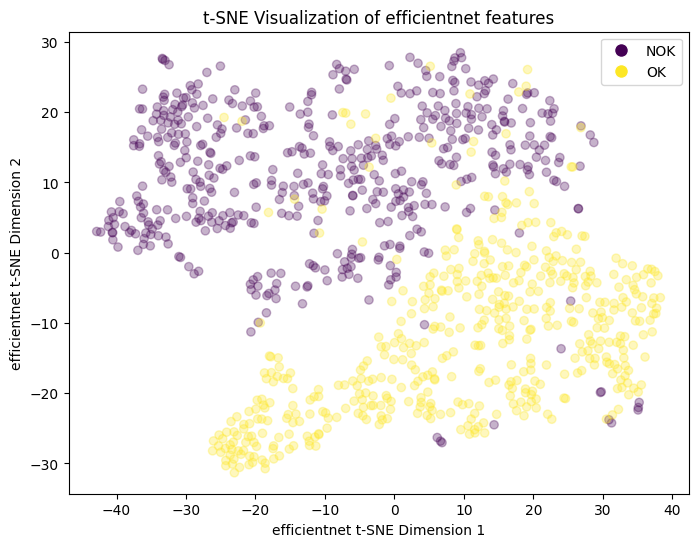

27/27 [==============================] - 3s 61ms/step
efficientnet extracted feature space size : (848, 1280)
TSNE reduced efficientnet feature space shape : (848, 2)


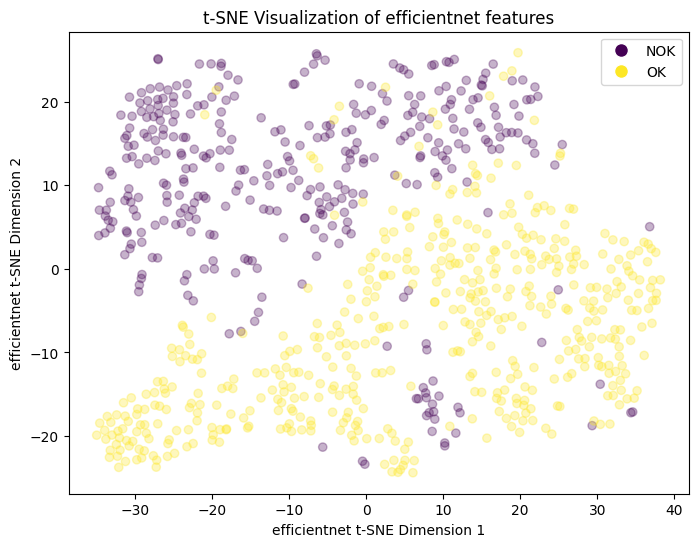

24/24 [==============================] - 2s 59ms/step
efficientnet extracted feature space size : (748, 1280)
TSNE reduced efficientnet feature space shape : (748, 2)


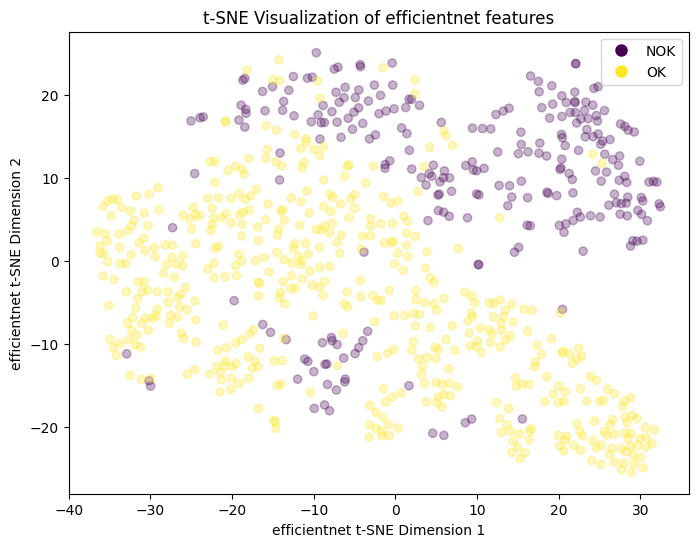

21/21 [==============================] - 2s 64ms/step
efficientnet extracted feature space size : (647, 1280)
TSNE reduced efficientnet feature space shape : (647, 2)


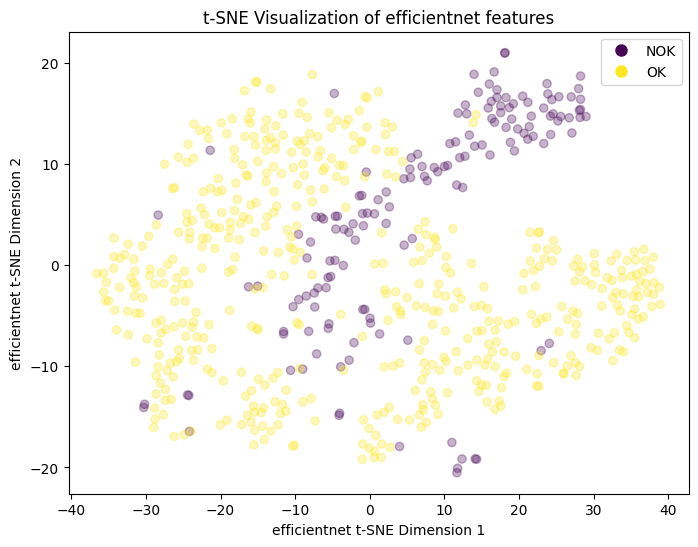

19/19 [==============================] - 2s 67ms/step
efficientnet extracted feature space size : (596, 1280)
TSNE reduced efficientnet feature space shape : (596, 2)


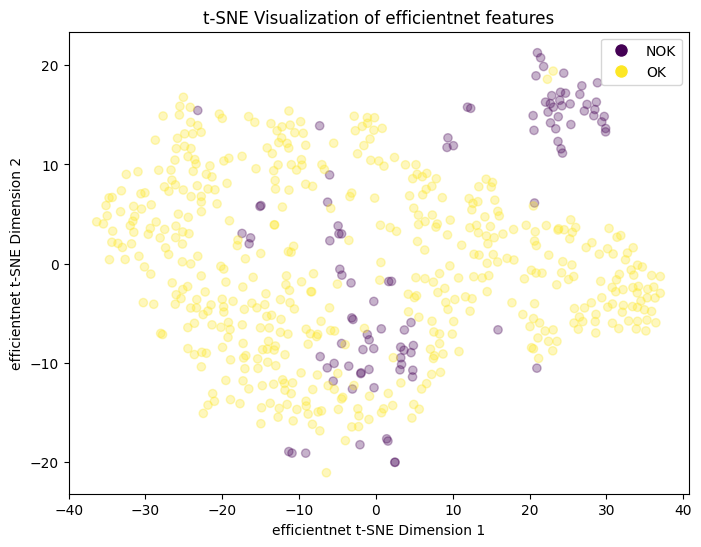

In [4]:
for dataset in loaders:
    efficientnet = CustomModel(model_name='efficientnet', data_loader = dataset)
    efficientnet.extract_features()
    efficientnet_tsne = FeatureSpaceVisualizer(efficientnet,reduction_method='tsne' )
    efficientnet_tsne.visualize()

In the next cell we run the feature extractiion, feature space reduction, clustering, metrics and model evaluation for all the versions of the dataset and finally append everything in the results dataset for investigation



 -------------------For datasetC:\Users\hdn7rng\Desktop\Experiments\datasets\PEG-------------------- 






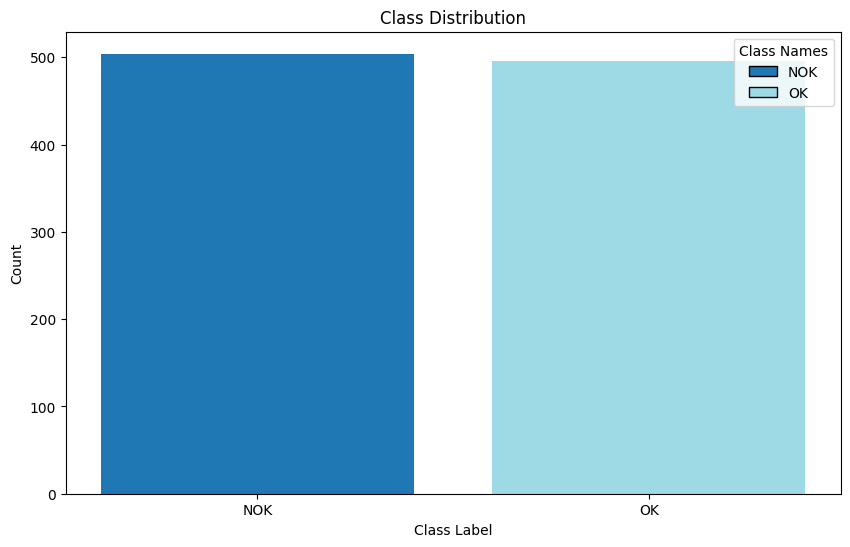

32/32 [==============================] - 3s 61ms/step
efficientnet extracted feature space size : (1000, 1280)
TSNE reduced efficientnet feature space shape : (1000, 2)


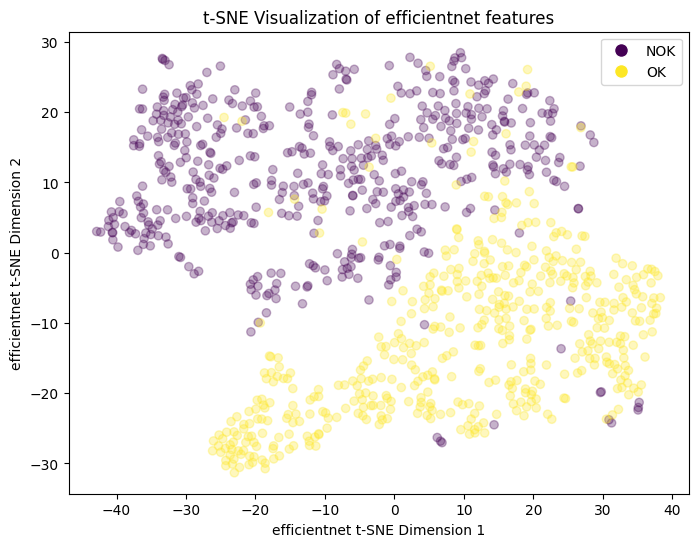

C:\Users\hdn7rng\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hdn7rng\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans Adjusted Rand Index (ARI -1-1): 0.04
KMeans Normalized Mutual Information (NMI 0-1): 0.03
KMeans Fowlkes-Mallows Score (0-1): 0.52
KMeans Vmeasure (0-1): 0.03
KMeans post clustering Silhouette: 0.21
KMeans post clustering calinski_harabasz_index: 322.61
KMeans post clustering davies_bouldin_index: 1.72
KMeans post clustering s_dbw: 0.87


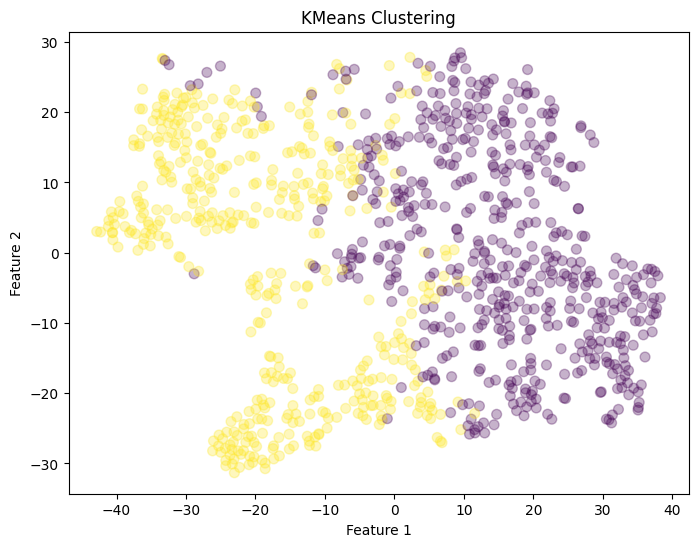

HDBSCAN Adjusted Rand Index (ARI -1-1): 0.14
HDBSCAN Normalized Mutual Information (NMI 0-1): 0.11
HDBSCAN Fowlkes-Mallows Score (0-1): 0.57
HDBSCAN Vmeasure (0-1): 0.11
HDBSCAN post clustering Silhouette: -0.11
HDBSCAN post clustering calinski_harabasz_index: 16.38
HDBSCAN post clustering davies_bouldin_index: 3.35
HDBSCAN post clustering s_dbw: 0.68


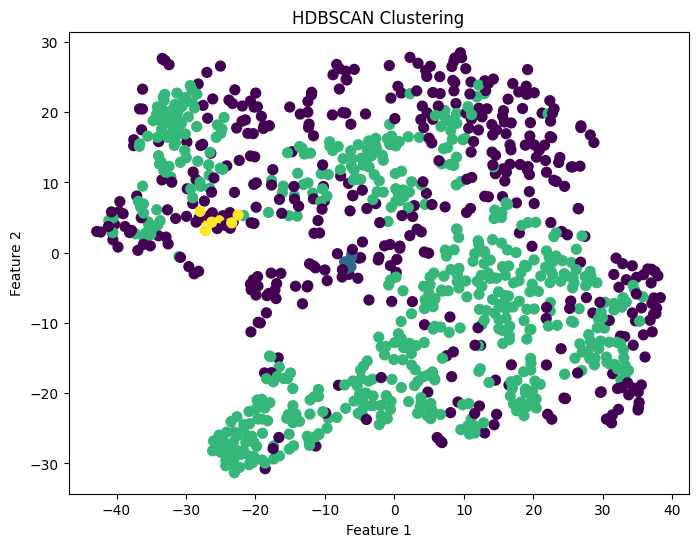

# of outliers : 1.000
Silhouette score : 0.087
Davies Bouldin Index *: 3.253
Calinski Harabasz Index: 88.029
S_Dbw *: 0.959
SVM Classifier Cross-Validation Accuracy: 98.30%
k-NN Classifier Cross-Validation Accuracy: 94.50%
Random Forest Classifier Cross-Validation Accuracy: 94.50%
num claasees : 2
4/4 [==============================] - 0s 0s/step
num claasees : 2
4/4 [==============================] - 0s 0s/step
num claasees : 2
4/4 [==============================] - 0s 5ms/step
num claasees : 2
4/4 [==============================] - 0s 0s/step
num claasees : 2
4/4 [==============================] - 0s 0s/step
num claasees : 2
4/4 [==============================] - 0s 0s/step
num claasees : 2
4/4 [==============================] - 0s 5ms/step
num claasees : 2
4/4 [==============================] - 0s 0s/step
num claasees : 2
4/4 [==============================] - 0s 0s/step
num claasees : 2
4/4 [==============================] - 0s 5ms/step
Neural network Classifier Cross-Validation Ac

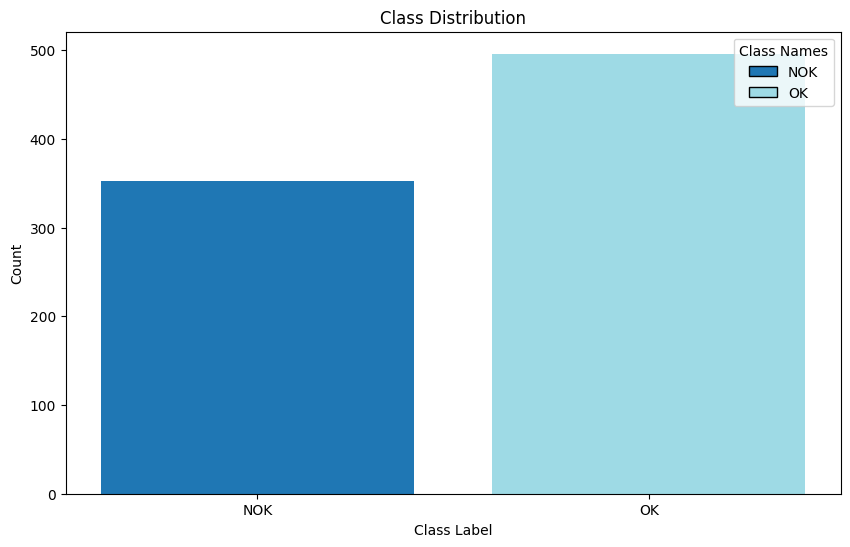

27/27 [==============================] - 2s 57ms/step
efficientnet extracted feature space size : (848, 1280)
TSNE reduced efficientnet feature space shape : (848, 2)


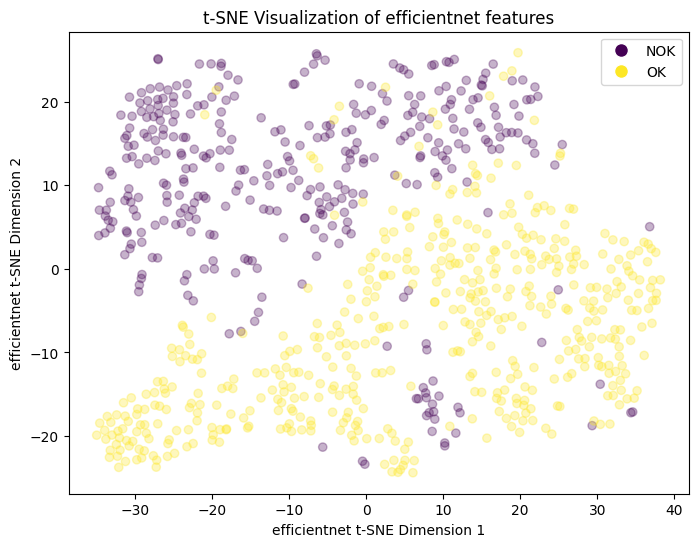

C:\Users\hdn7rng\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hdn7rng\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans Adjusted Rand Index (ARI -1-1): 0.04
KMeans Normalized Mutual Information (NMI 0-1): 0.03
KMeans Fowlkes-Mallows Score (0-1): 0.53
KMeans Vmeasure (0-1): 0.03
KMeans post clustering Silhouette: 0.22
KMeans post clustering calinski_harabasz_index: 288.89
KMeans post clustering davies_bouldin_index: 1.66
KMeans post clustering s_dbw: 0.86


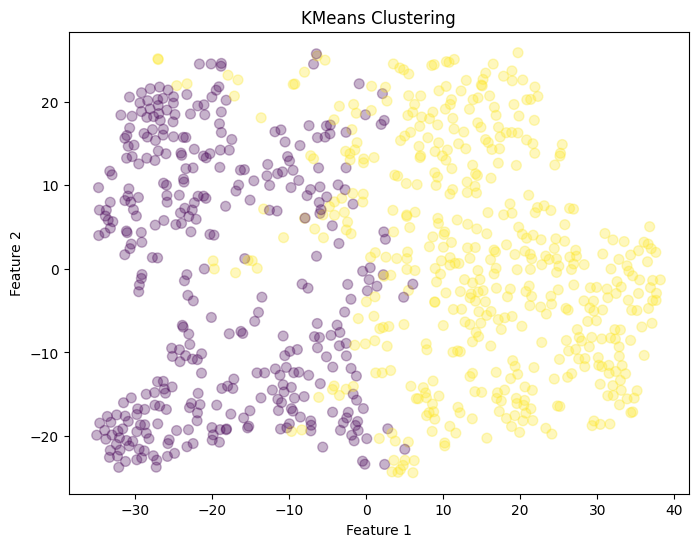

HDBSCAN Adjusted Rand Index (ARI -1-1): 0.22
HDBSCAN Normalized Mutual Information (NMI 0-1): 0.15
HDBSCAN Fowlkes-Mallows Score (0-1): 0.63
HDBSCAN Vmeasure (0-1): 0.15
HDBSCAN post clustering Silhouette: -0.03
HDBSCAN post clustering calinski_harabasz_index: 18.60
HDBSCAN post clustering davies_bouldin_index: 3.82
HDBSCAN post clustering s_dbw: 0.65


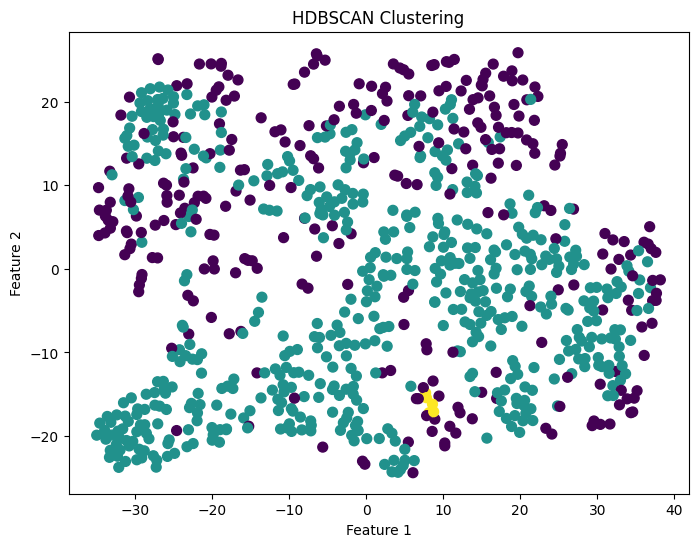

# of outliers : 1.000
Silhouette score : 0.088
Davies Bouldin Index *: 3.165
Calinski Harabasz Index: 75.797
S_Dbw *: 0.949
SVM Classifier Cross-Validation Accuracy: 97.64%
k-NN Classifier Cross-Validation Accuracy: 93.04%
Random Forest Classifier Cross-Validation Accuracy: 94.22%
num claasees : 2
3/3 [==============================] - 0s 8ms/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 8ms/step
num claasees : 2
3/3 [==============================] - 0s 8ms/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 8ms/step
Neural network Classifier Cross-Validation A

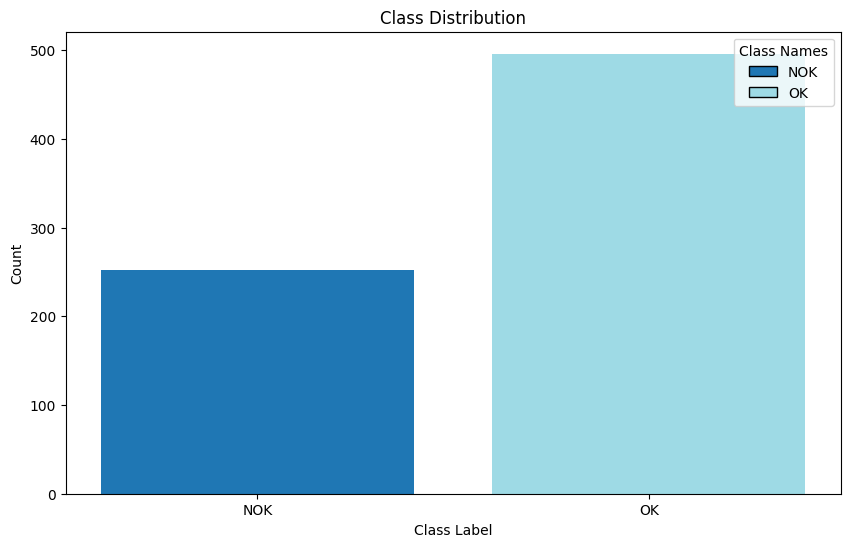

24/24 [==============================] - 2s 62ms/step
efficientnet extracted feature space size : (748, 1280)
TSNE reduced efficientnet feature space shape : (748, 2)


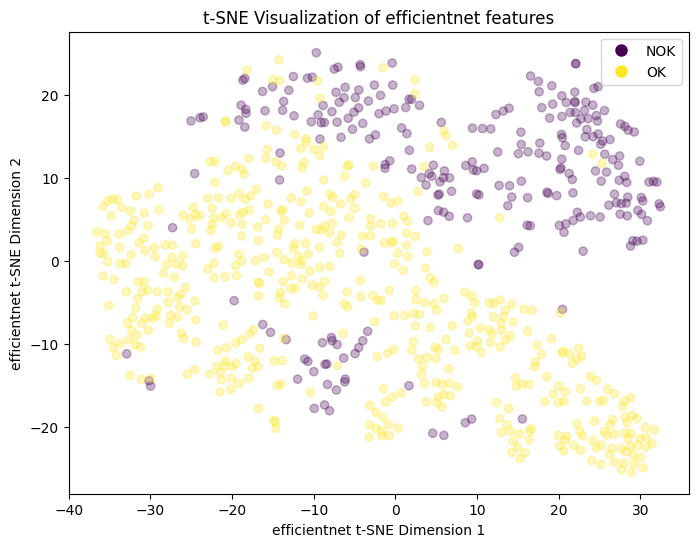

C:\Users\hdn7rng\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hdn7rng\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans Adjusted Rand Index (ARI -1-1): 0.06
KMeans Normalized Mutual Information (NMI 0-1): 0.04
KMeans Fowlkes-Mallows Score (0-1): 0.56
KMeans Vmeasure (0-1): 0.04
KMeans post clustering Silhouette: 0.23
KMeans post clustering calinski_harabasz_index: 275.11
KMeans post clustering davies_bouldin_index: 1.61
KMeans post clustering s_dbw: 0.86


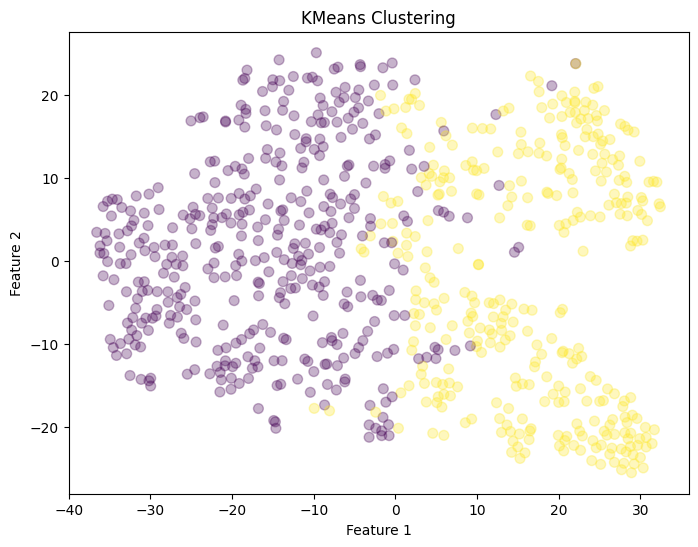

HDBSCAN Adjusted Rand Index (ARI -1-1): 0.36
HDBSCAN Normalized Mutual Information (NMI 0-1): 0.27
HDBSCAN Fowlkes-Mallows Score (0-1): 0.69
HDBSCAN Vmeasure (0-1): 0.27
HDBSCAN post clustering Silhouette: 0.03
HDBSCAN post clustering calinski_harabasz_index: 32.75
HDBSCAN post clustering davies_bouldin_index: 3.48
HDBSCAN post clustering s_dbw: 0.80


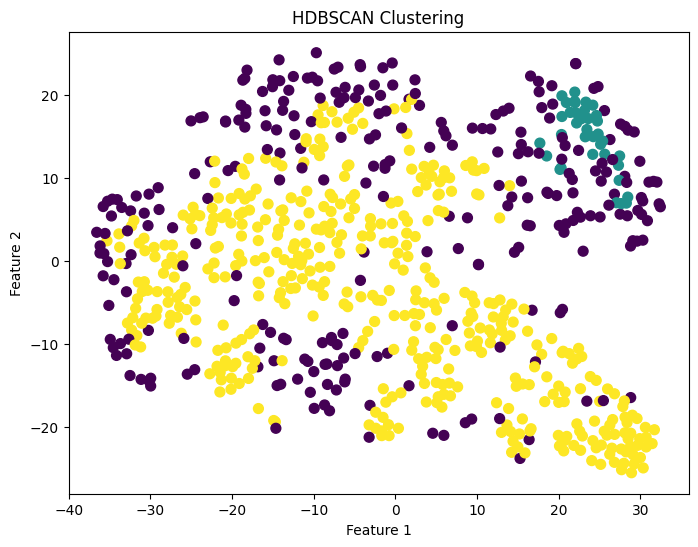

# of outliers : 1.000
Silhouette score : 0.083
Davies Bouldin Index *: 3.276
Calinski Harabasz Index: 57.114
S_Dbw *: 0.950
SVM Classifier Cross-Validation Accuracy: 97.47%
k-NN Classifier Cross-Validation Accuracy: 92.38%
Random Forest Classifier Cross-Validation Accuracy: 93.86%
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 8ms/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 8ms/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 8ms/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
Neural network Classifier Cross-Validation Ac

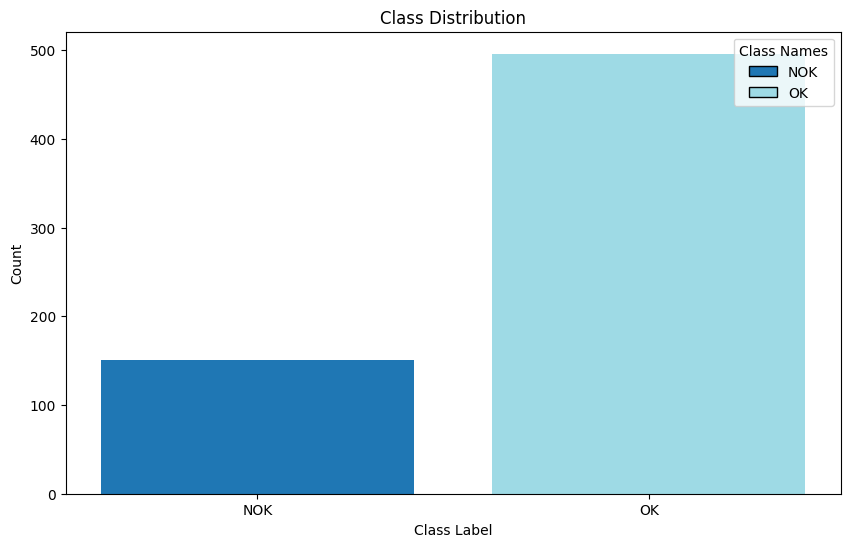

21/21 [==============================] - 3s 66ms/step
efficientnet extracted feature space size : (647, 1280)
TSNE reduced efficientnet feature space shape : (647, 2)


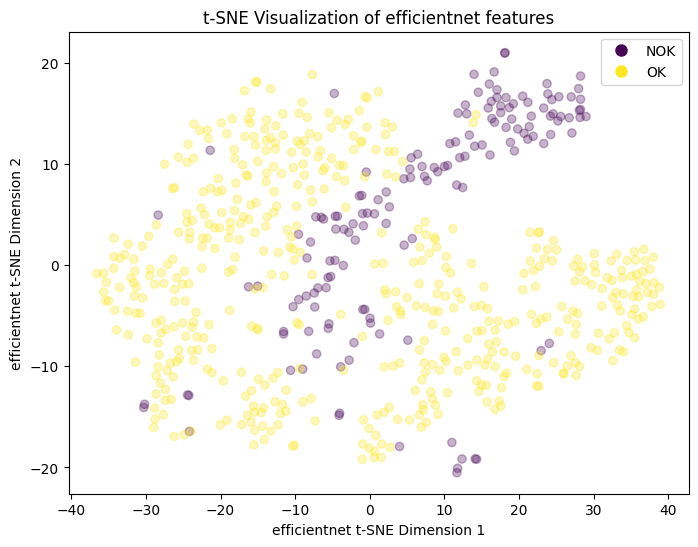

C:\Users\hdn7rng\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hdn7rng\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans Adjusted Rand Index (ARI -1-1): 0.05
KMeans Normalized Mutual Information (NMI 0-1): 0.02
KMeans Fowlkes-Mallows Score (0-1): 0.60
KMeans Vmeasure (0-1): 0.02
KMeans post clustering Silhouette: 0.25
KMeans post clustering calinski_harabasz_index: 268.95
KMeans post clustering davies_bouldin_index: 1.48
KMeans post clustering s_dbw: 0.84


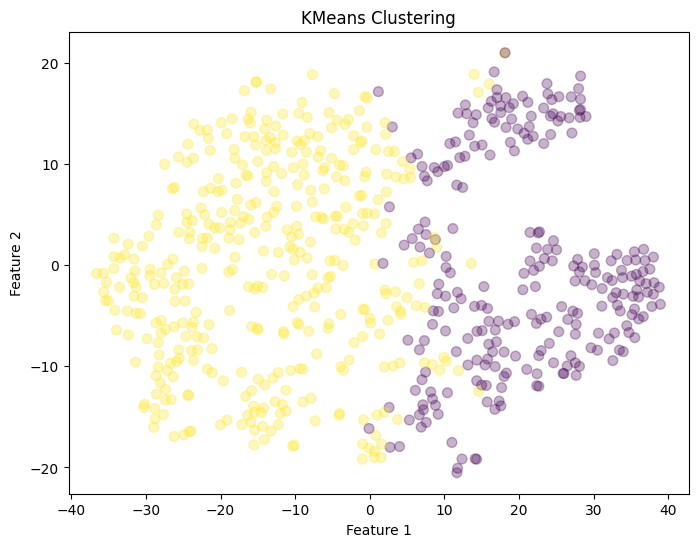

HDBSCAN Adjusted Rand Index (ARI -1-1): 0.38
HDBSCAN Normalized Mutual Information (NMI 0-1): 0.28
HDBSCAN Fowlkes-Mallows Score (0-1): 0.74
HDBSCAN Vmeasure (0-1): 0.28
HDBSCAN post clustering Silhouette: 0.01
HDBSCAN post clustering calinski_harabasz_index: 20.29
HDBSCAN post clustering davies_bouldin_index: 3.34
HDBSCAN post clustering s_dbw: 0.75


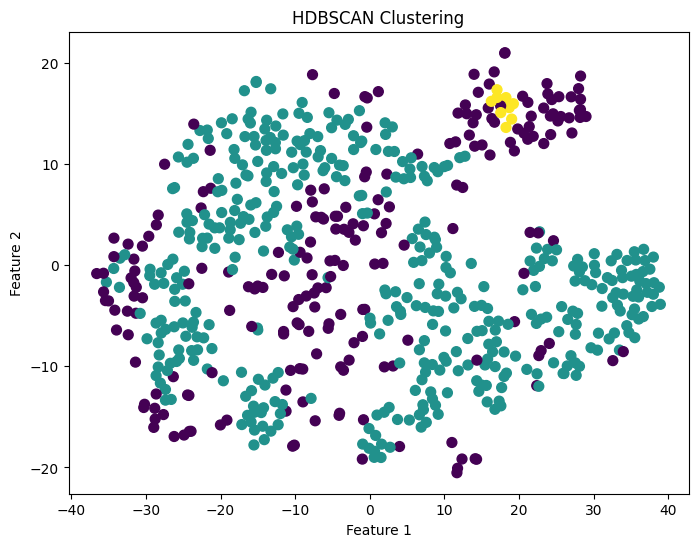

# of outliers : 1.000
Silhouette score : 0.084
Davies Bouldin Index *: 3.314
Calinski Harabasz Index: 38.665
S_Dbw *: 0.958
SVM Classifier Cross-Validation Accuracy: 97.06%
k-NN Classifier Cross-Validation Accuracy: 91.50%
Random Forest Classifier Cross-Validation Accuracy: 95.05%
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 8ms/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
3/3 [==============================] - 0s 0s/step
num claasees : 2
2/2 [==============================] - 0s 16ms/step
num claasees : 2
2/2 [==============================] - 0s 0s/step
num claasees : 2
2/2 [==============================] - 0s 0s/step
Neural network Classifier Cross-Validation Ac

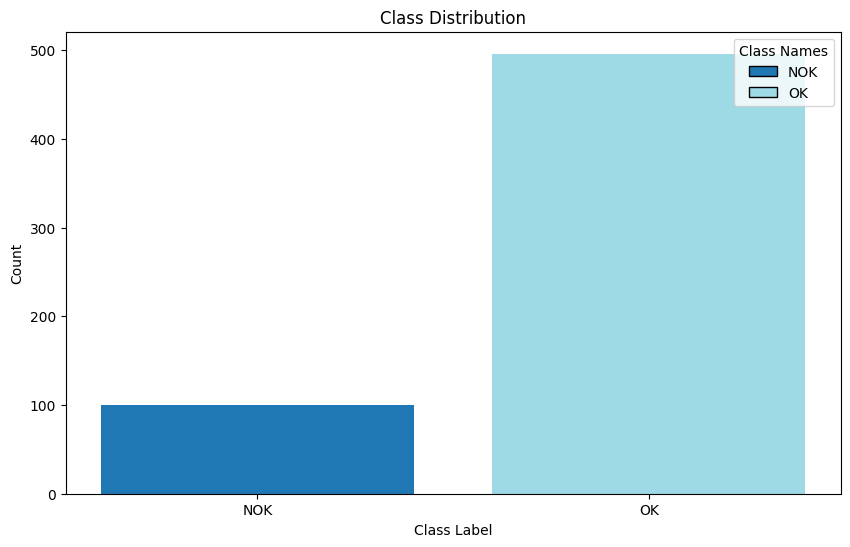

19/19 [==============================] - 2s 63ms/step
efficientnet extracted feature space size : (596, 1280)
TSNE reduced efficientnet feature space shape : (596, 2)


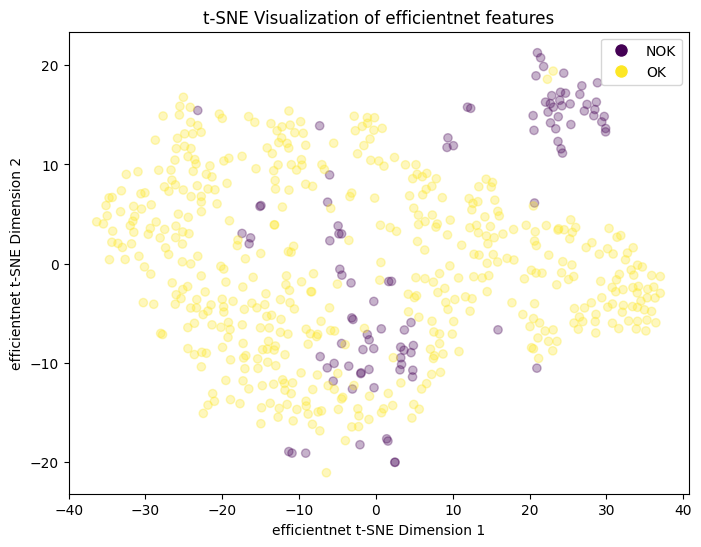

C:\Users\hdn7rng\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hdn7rng\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans Adjusted Rand Index (ARI -1-1): 0.03
KMeans Normalized Mutual Information (NMI 0-1): 0.01
KMeans Fowlkes-Mallows Score (0-1): 0.63
KMeans Vmeasure (0-1): 0.01
KMeans post clustering Silhouette: 0.26
KMeans post clustering calinski_harabasz_index: 252.52
KMeans post clustering davies_bouldin_index: 1.45
KMeans post clustering s_dbw: 0.84


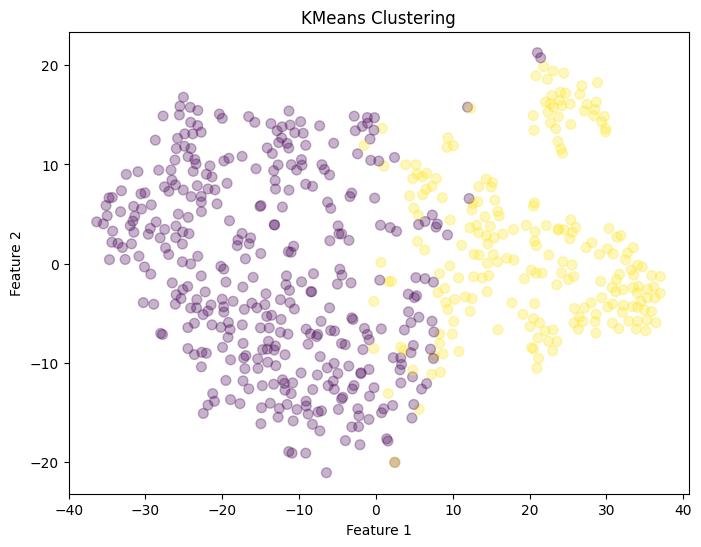

HDBSCAN Adjusted Rand Index (ARI -1-1): 0.46
HDBSCAN Normalized Mutual Information (NMI 0-1): 0.31
HDBSCAN Fowlkes-Mallows Score (0-1): 0.82
HDBSCAN Vmeasure (0-1): 0.31
HDBSCAN post clustering Silhouette: 0.02
HDBSCAN post clustering calinski_harabasz_index: 18.77
HDBSCAN post clustering davies_bouldin_index: 3.13
HDBSCAN post clustering s_dbw: 0.74


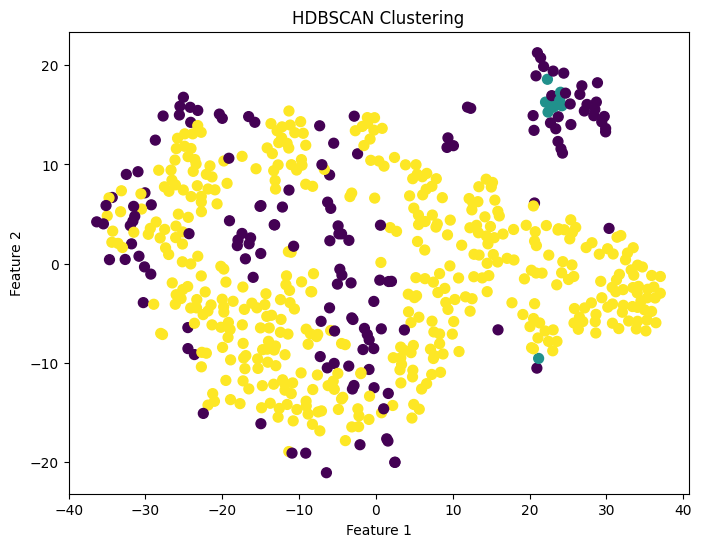

# of outliers : 1.000
Silhouette score : 0.081
Davies Bouldin Index *: 3.226
Calinski Harabasz Index: 28.822
S_Dbw *: 0.944
SVM Classifier Cross-Validation Accuracy: 97.98%
k-NN Classifier Cross-Validation Accuracy: 90.26%
Random Forest Classifier Cross-Validation Accuracy: 95.47%
num claasees : 2
2/2 [==============================] - 0s 0s/step
num claasees : 2
2/2 [==============================] - 0s 0s/step
num claasees : 2
2/2 [==============================] - 0s 6ms/step
num claasees : 2
2/2 [==============================] - 0s 0s/step
num claasees : 2
2/2 [==============================] - 0s 0s/step
num claasees : 2
2/2 [==============================] - 0s 0s/step
num claasees : 2
2/2 [==============================] - 0s 0s/step
num claasees : 2
2/2 [==============================] - 0s 16ms/step
num claasees : 2
2/2 [==============================] - 0s 0s/step
num claasees : 2
2/2 [==============================] - 0s 0s/step
Neural network Classifier Cross-Validation Ac

In [6]:
%%time

# For each imbalanced dataset
for dataset in loaders:
    
    # Print dataset names
    print(f'\n\n -------------------For dataset{dataset.dataset_path}-------------------- \n\n\n\n') 
    
    # plot class distributions
    dataset.visualize_class_distribution()
    
    # create the model
    efficientnet = CustomModel(model_name='efficientnet', data_loader = dataset)
    
    # extract the features
    efficientnet.extract_features()
    
    # Create the feature space visualizer to perform feature space reduction
    efficientnet_tsne = FeatureSpaceVisualizer(efficientnet,reduction_method='tsne' )
    
    # visualize the tsne reduced feature space
    efficientnet_tsne.visualize()
    
    # Perform KMeans and HDBSCAN clusering on the high dim feature space
    kmeans_metrics = efficientnet_tsne.kmeans_clustering()
    hdb_metrics = efficientnet_tsne.hdbscan_clustering()
    efficientnet_metrics = Metrics(feature_space = efficientnet.features, data_loader = dataset)

    #Evaluate the feature space using ML models and cross validation
    efficientnet_evaluator = ModelEvaluator(efficientnet, dataset, efficientnet_tsne, test_size = 0.3)
    ml_scores = efficientnet_evaluator.evaluate_with_cross_validation()

    
    # Populating results for this version of dataset
    loaders[dataset].append(efficientnet_metrics.metrics)
    loaders[dataset].append(kmeans_metrics)
    loaders[dataset].append(ml_scores)
    loaders[dataset].append(hdb_metrics)

#### Storing results

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Extract DBI, Silhouette, CH, SDBW,  values
dbi_values = []
silhouette_values = []
ch_values = []
sdbw_values = []

# Extract ML scores
svm_values = []
nn_values = []
knn_values = []
rf_values = []

# HDBSCANExtrinsic metrics
HDBSCANari_values = []
HDBSCANnmi_values = []
HDBSCANfm_values = []
HDBSCANvm_values = []

# KMeansExtrinsic metrics
KMeansari_values = []
KMeansnmi_values = []
KMeansfm_values = []
KMeansvm_values = []

# read the results dict and extract the metrics
for key, value in loaders.items():
    dbi = value[0]['DBI']
    silhouette = value[0]['silhouette']
    ch = value[0]['CH']
    sdbw = value[0]['sdbw']
    
    svm = value[2]['svm']
    nn = value[2]['nn']
    rf = value[2]['rf']
    knn = value[2]['knn']

    # for HDBSCAN
    HDBSCANari = value[3]['HDBSCANari']
    HDBSCANnmi = value[3]['HDBSCANnmi']
    HDBSCANfm = value[3]['HDBSCANfm']
    HDBSCANvm = value[3]['HDBSCANvm']
    
    # for kmeans
    KMeansari = value[1]['KMeansari']
    KMeansnmi = value[1]['KMeansnmi']
    KMeansfm = value[1]['KMeansfm']
    KMeansvm = value[1]['KMeansvm']



    # Store the intrinsic metric values
    dbi_values.append(dbi)
    silhouette_values.append(silhouette)
    ch_values.append(ch)
    sdbw_values.append(sdbw)
    
    # Storing the final values of ML models for all datasets
    svm_values.append(svm)
    nn_values.append(nn)
    rf_values.append(rf)
    knn_values.append(knn)

    # For storing all the extrinsic values for HDBSCAN metrics
    HDBSCANvm_values.append(HDBSCANvm)
    HDBSCANfm_values.append(HDBSCANfm)
    HDBSCANnmi_values.append(HDBSCANnmi)
    HDBSCANari_values.append(HDBSCANari)

    # For storing all the KMeans clustering 
    KMeansvm_values.append(KMeansvm)
    KMeansfm_values.append(KMeansfm)
    KMeansnmi_values.append(KMeansnmi)
    KMeansari_values.append(KMeansari)
    

#### Plotting ML accuracy results

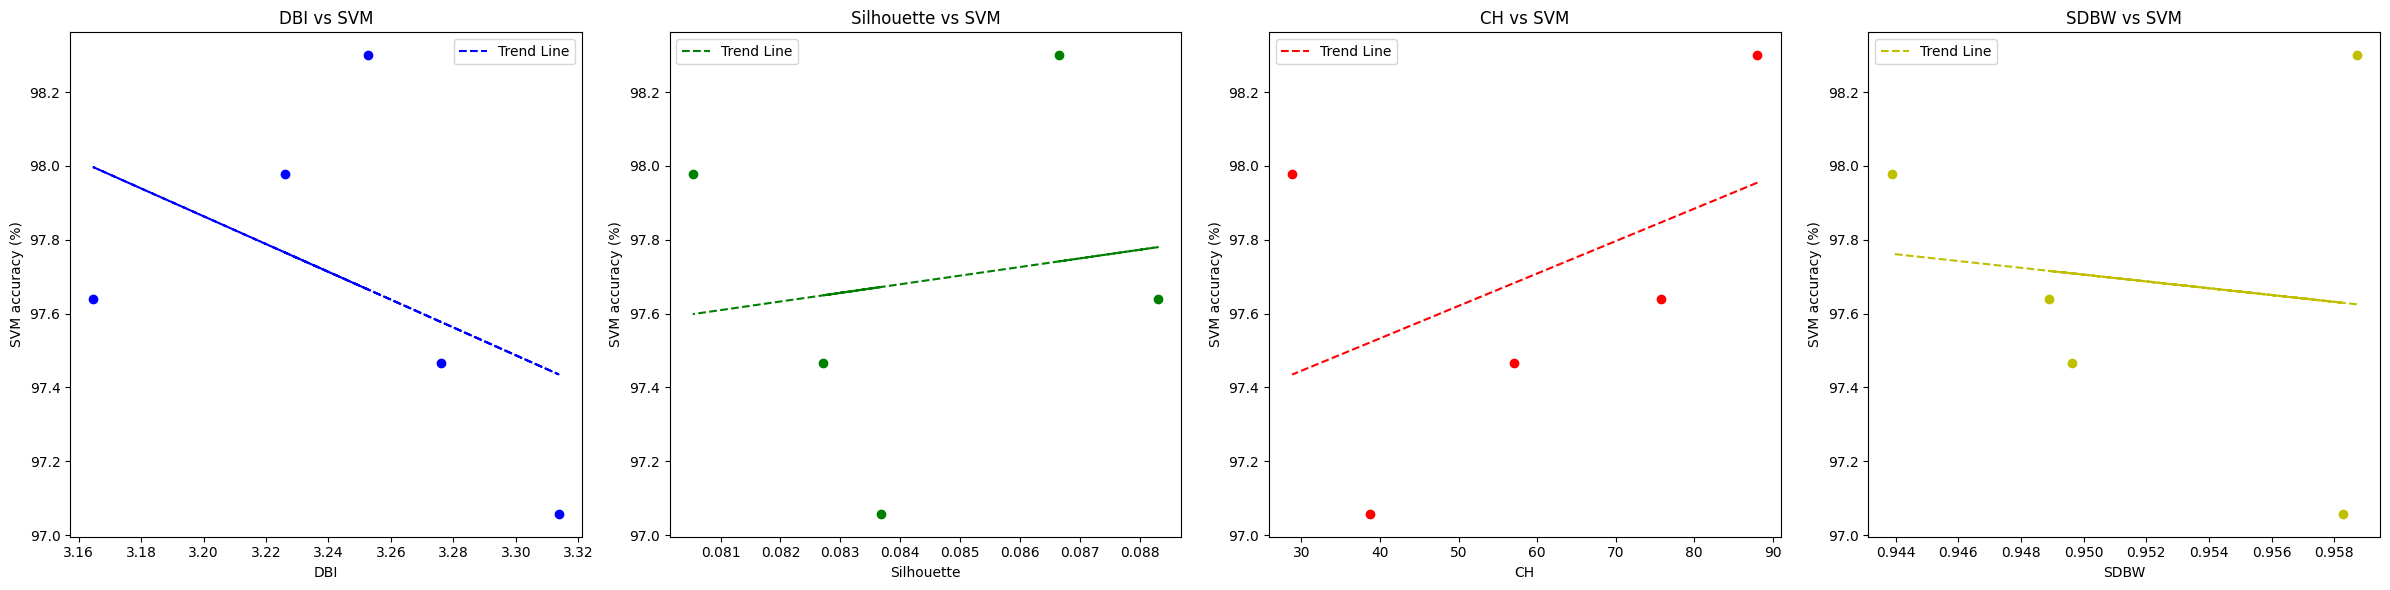

In [17]:
# Create scatter plots with trend lines
plt.figure(figsize=(24, 6))

# DBI vs SVM
plt.subplot(141)
plt.scatter(dbi_values, svm_values, c='b', marker='o')
plt.xlabel('DBI')
plt.ylabel('SVM accuracy (%)')
plt.title('DBI vs SVM')

dbi_fit = np.polyfit(dbi_values, svm_values, 1)
plt.plot(dbi_values, np.polyval(dbi_fit, dbi_values), 'b--', label='Trend Line')
plt.legend()

# Silhouette vs SVM
plt.subplot(142)
plt.scatter(silhouette_values, svm_values, c='g', marker='o')
plt.xlabel('Silhouette')
plt.ylabel('SVM accuracy (%)')
plt.title('Silhouette vs SVM')

silhouette_fit = np.polyfit(silhouette_values, svm_values, 1)
plt.plot(silhouette_values, np.polyval(silhouette_fit, silhouette_values), 'g--', label='Trend Line')
plt.legend()

# CH vs SVM
plt.subplot(143)
plt.scatter(ch_values, svm_values, c='r', marker='o')
plt.xlabel('CH')
plt.ylabel('SVM accuracy (%)')
plt.title('CH vs SVM')

ch_fit = np.polyfit(ch_values, svm_values, 1)
plt.plot(ch_values, np.polyval(ch_fit, ch_values), 'r--', label='Trend Line')
plt.legend()

# SDBW vs SVM
plt.subplot(144)
plt.scatter(sdbw_values, svm_values, c='y', marker='o')
plt.xlabel('SDBW')
plt.ylabel('SVM accuracy (%)')
plt.title('SDBW vs SVM')

sdbw_fit = np.polyfit(sdbw_values, svm_values, 1)
plt.plot(sdbw_values, np.polyval(sdbw_fit, sdbw_values), 'y--', label='Trend Line')
plt.legend()

plt.tight_layout()
plt.savefig('svm_vs_metrics', dpi=300)

plt.show()


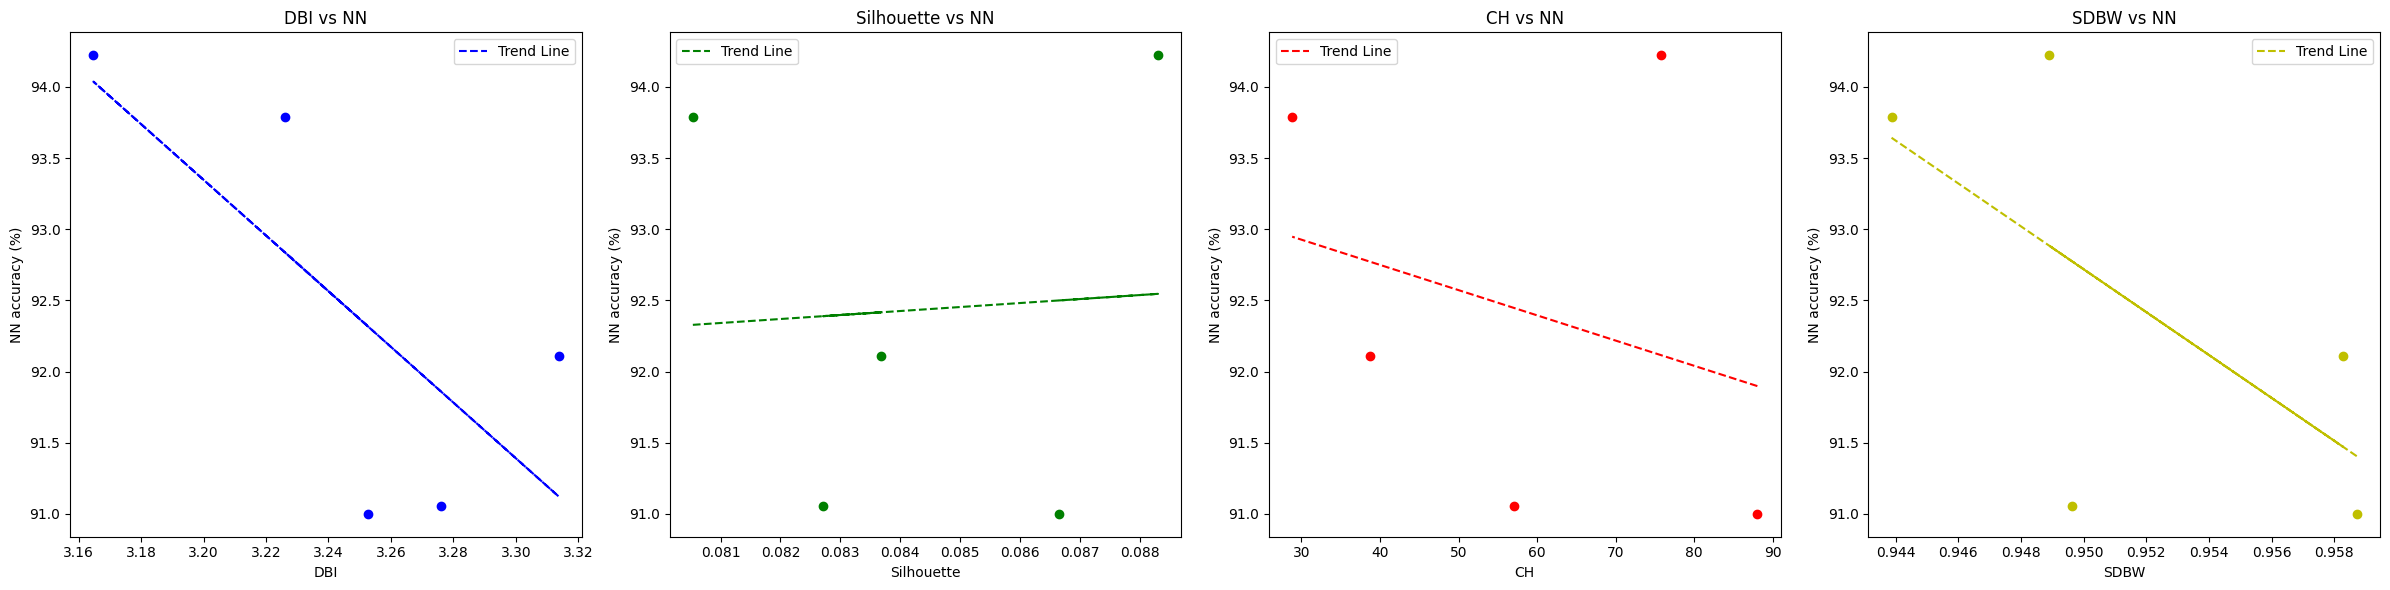

In [18]:
# Create scatter plots with trend lines for NN
plt.figure(figsize=(24, 6))

# DBI vs NN
plt.subplot(141)
plt.scatter(dbi_values, nn_values, c='b', marker='o')
plt.xlabel('DBI')
plt.ylabel('NN accuracy (%)')
plt.title('DBI vs NN')

dbi_fit = np.polyfit(dbi_values, nn_values, 1)
plt.plot(dbi_values, np.polyval(dbi_fit, dbi_values), 'b--', label='Trend Line')
plt.legend()

# Silhouette vs NN
plt.subplot(142)
plt.scatter(silhouette_values, nn_values, c='g', marker='o')
plt.xlabel('Silhouette')
plt.ylabel('NN accuracy (%)')
plt.title('Silhouette vs NN')

silhouette_fit = np.polyfit(silhouette_values, nn_values, 1)
plt.plot(silhouette_values, np.polyval(silhouette_fit, silhouette_values), 'g--', label='Trend Line')
plt.legend()

# CH vs NN
plt.subplot(143)
plt.scatter(ch_values, nn_values, c='r', marker='o')
plt.xlabel('CH')
plt.ylabel('NN accuracy (%)')
plt.title('CH vs NN')

ch_fit = np.polyfit(ch_values, nn_values, 1)
plt.plot(ch_values, np.polyval(ch_fit, ch_values), 'r--', label='Trend Line')
plt.legend()

# SDBW vs NN
plt.subplot(144)
plt.scatter(sdbw_values, nn_values, c='y', marker='o')
plt.xlabel('SDBW')
plt.ylabel('NN accuracy (%)')
plt.title('SDBW vs NN')

sdbw_fit = np.polyfit(sdbw_values, nn_values, 1)
plt.plot(sdbw_values, np.polyval(sdbw_fit, sdbw_values), 'y--', label='Trend Line')
plt.legend()

plt.tight_layout()
plt.savefig('nn_vs_metrics', dpi=300)

plt.show()


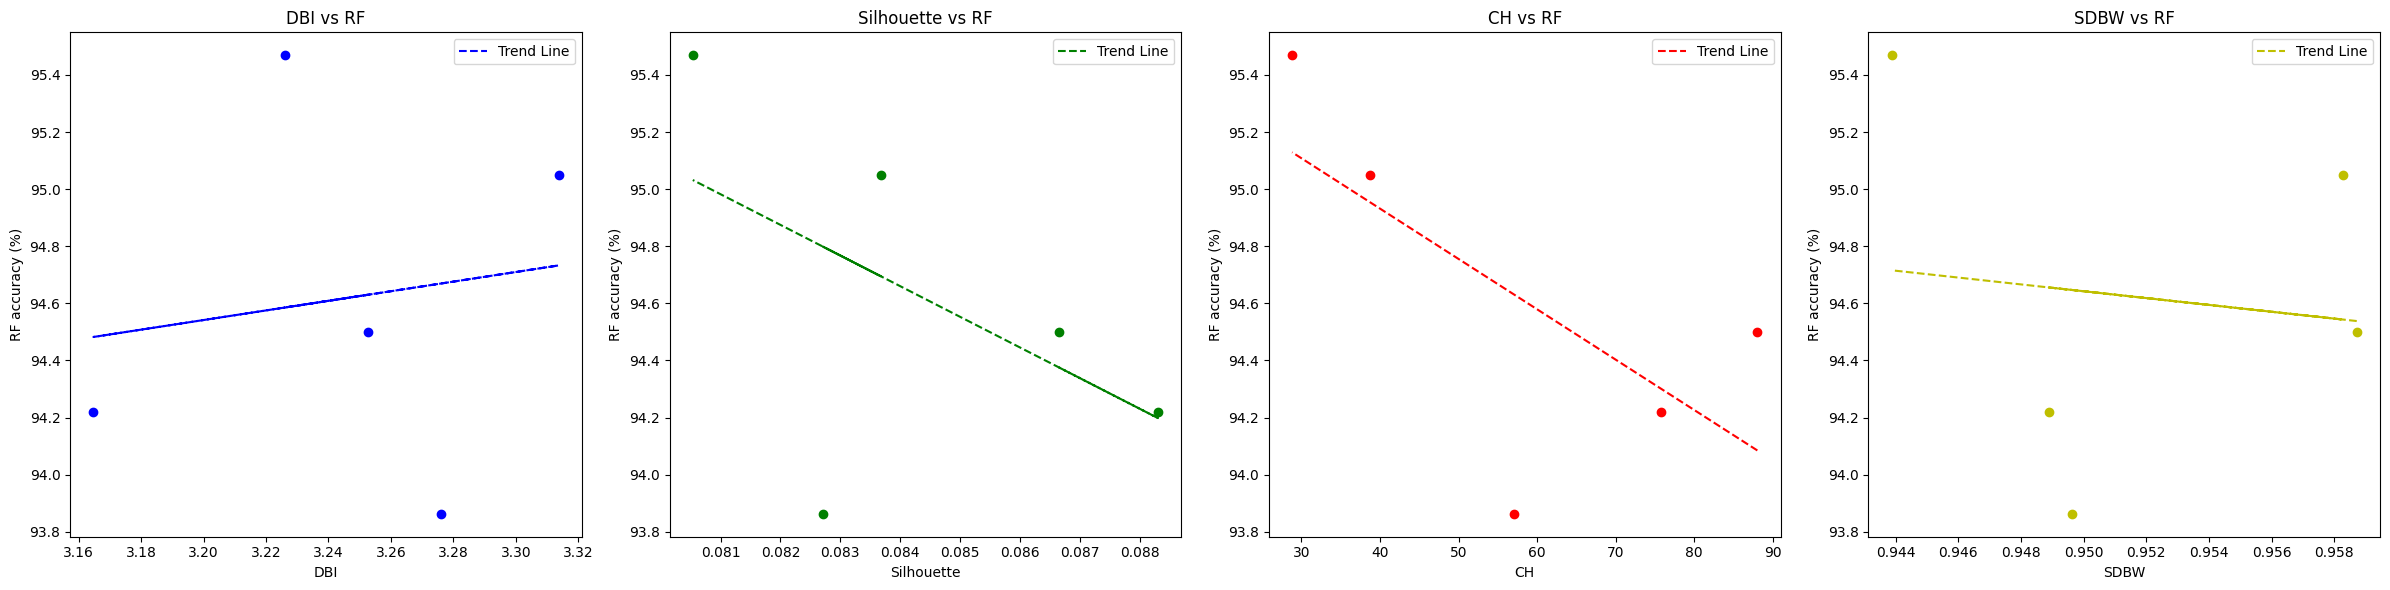

In [19]:
# Create scatter plots with trend lines for RF
plt.figure(figsize=(24, 6))

# DBI vs RF
plt.subplot(141)
plt.scatter(dbi_values, rf_values, c='b', marker='o')
plt.xlabel('DBI')
plt.ylabel('RF accuracy (%)')
plt.title('DBI vs RF')

dbi_fit = np.polyfit(dbi_values, rf_values, 1)
plt.plot(dbi_values, np.polyval(dbi_fit, dbi_values), 'b--', label='Trend Line')
plt.legend()

# Silhouette vs RF
plt.subplot(142)
plt.scatter(silhouette_values, rf_values, c='g', marker='o')
plt.xlabel('Silhouette')
plt.ylabel('RF accuracy (%)')
plt.title('Silhouette vs RF')

silhouette_fit = np.polyfit(silhouette_values, rf_values, 1)
plt.plot(silhouette_values, np.polyval(silhouette_fit, silhouette_values), 'g--', label='Trend Line')
plt.legend()

# CH vs RF
plt.subplot(143)
plt.scatter(ch_values, rf_values, c='r', marker='o')
plt.xlabel('CH')
plt.ylabel('RF accuracy (%)')
plt.title('CH vs RF')

ch_fit = np.polyfit(ch_values, rf_values, 1)
plt.plot(ch_values, np.polyval(ch_fit, ch_values), 'r--', label='Trend Line')
plt.legend()

# SDBW vs RF
plt.subplot(144)
plt.scatter(sdbw_values, rf_values, c='y', marker='o')
plt.xlabel('SDBW')
plt.ylabel('RF accuracy (%)')
plt.title('SDBW vs RF')

sdbw_fit = np.polyfit(sdbw_values, rf_values, 1)
plt.plot(sdbw_values, np.polyval(sdbw_fit, sdbw_values), 'y--', label='Trend Line')
plt.legend()

plt.tight_layout()
plt.savefig('dbi_vs_metrics', dpi=300)

plt.show()


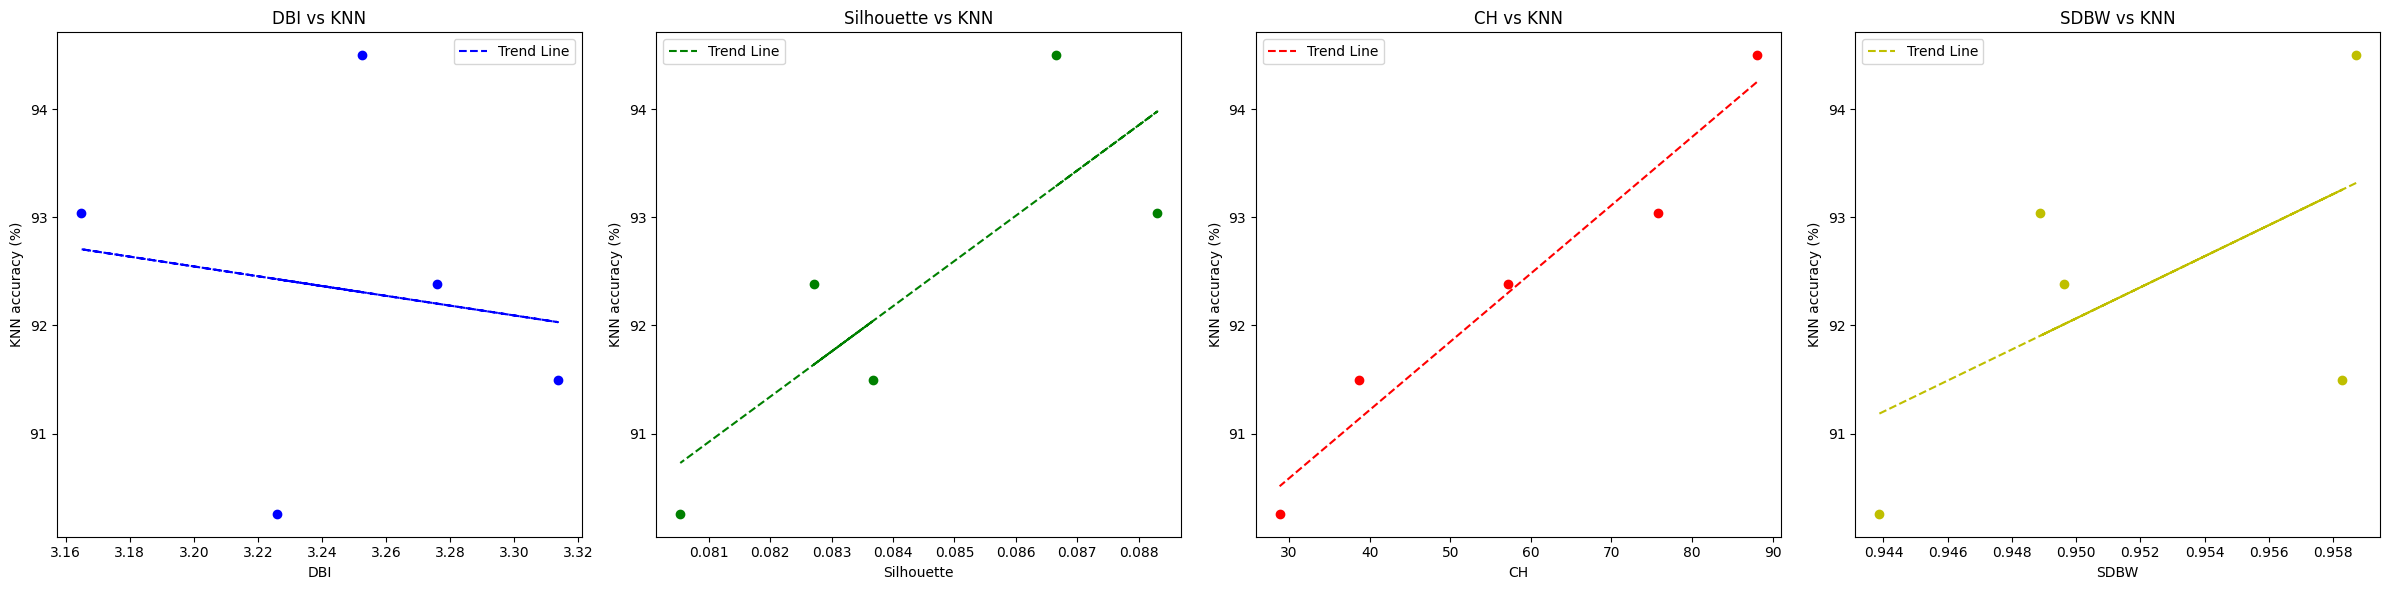

In [20]:
# Create scatter plots with trend lines for KNN
plt.figure(figsize=(24, 6))

# DBI vs KNN
plt.subplot(141)
plt.scatter(dbi_values, knn_values, c='b', marker='o')
plt.xlabel('DBI')
plt.ylabel('KNN accuracy (%)')
plt.title('DBI vs KNN')

dbi_fit = np.polyfit(dbi_values, knn_values, 1)
plt.plot(dbi_values, np.polyval(dbi_fit, dbi_values), 'b--', label='Trend Line')
plt.legend()

# Silhouette vs KNN
plt.subplot(142)
plt.scatter(silhouette_values, knn_values, c='g', marker='o')
plt.xlabel('Silhouette')
plt.ylabel('KNN accuracy (%)')
plt.title('Silhouette vs KNN')

silhouette_fit = np.polyfit(silhouette_values, knn_values, 1)
plt.plot(silhouette_values, np.polyval(silhouette_fit, silhouette_values), 'g--', label='Trend Line')
plt.legend()

# CH vs KNN
plt.subplot(143)
plt.scatter(ch_values, knn_values, c='r', marker='o')
plt.xlabel('CH')
plt.ylabel('KNN accuracy (%)')
plt.title('CH vs KNN')

ch_fit = np.polyfit(ch_values, knn_values, 1)
plt.plot(ch_values, np.polyval(ch_fit, ch_values), 'r--', label='Trend Line')
plt.legend()

# SDBW vs KNN
plt.subplot(144)
plt.scatter(sdbw_values, knn_values, c='y', marker='o')
plt.xlabel('SDBW')
plt.ylabel('KNN accuracy (%)')
plt.title('SDBW vs KNN')

sdbw_fit = np.polyfit(sdbw_values, knn_values, 1)
plt.plot(sdbw_values, np.polyval(sdbw_fit, sdbw_values), 'y--', label='Trend Line')
plt.legend()

plt.tight_layout()
plt.savefig('knn_vs_metrics', dpi=300)
plt.show()


#### Plotting correlation coefficients

In [21]:
# Calculate SVM correlation coefficients
correlation_dbi_svm = np.corrcoef(dbi_values, svm_values)[0, 1]
correlation_silhouette_svm = np.corrcoef(silhouette_values, svm_values)[0, 1]
correlation_ch_svm = np.corrcoef(ch_values, svm_values)[0, 1]
correlation_sdbw_svm = np.corrcoef(sdbw_values, svm_values)[0, 1]

print(f"Correlation DBI vs SVM: {correlation_dbi_svm}")
print(f"Correlation Silhouette vs SVM: {correlation_silhouette_svm}")
print(f"Correlation CH vs SVM: {correlation_ch_svm}")
print(f"Correlation SDBW vs SVM: {correlation_sdbw_svm}")
print(f"----------------------------------")


# Calculate nn correlation coefficients
correlation_dbi_nn = np.corrcoef(dbi_values, nn_values)[0, 1]
correlation_silhouette_nn = np.corrcoef(silhouette_values, nn_values)[0, 1]
correlation_ch_nn = np.corrcoef(ch_values, nn_values)[0, 1]
correlation_sdbw_nn = np.corrcoef(sdbw_values, nn_values)[0, 1]

print(f"Correlation DBI vs NN: {correlation_dbi_nn}")
print(f"Correlation Silhouette vs NN: {correlation_silhouette_nn}")
print(f"Correlation CH vs NN: {correlation_ch_nn}")
print(f"Correlation SDBW vs N:N {correlation_sdbw_nn}")
print(f"----------------------------------")

# Calculate rf correlation coefficients
correlation_dbi_rf = np.corrcoef(dbi_values, rf_values)[0, 1]
correlation_silhouette_rf = np.corrcoef(silhouette_values, rf_values)[0, 1]
correlation_ch_rf = np.corrcoef(ch_values, rf_values)[0, 1]
correlation_sdbw_rf = np.corrcoef(sdbw_values, rf_values)[0, 1]

print(f"Correlation DBI vs rf: {correlation_dbi_rf}")
print(f"Correlation Silhouette vs rf: {correlation_silhouette_rf}")
print(f"Correlation CH vs rf: {correlation_ch_rf}")
print(f"Correlation SDBW vs rf {correlation_sdbw_rf}")
print(f"----------------------------------")

# Calculate knn correlation coefficients
correlation_dbi_knn = np.corrcoef(dbi_values, knn_values)[0, 1]
correlation_silhouette_knn = np.corrcoef(silhouette_values, knn_values)[0, 1]
correlation_ch_knn = np.corrcoef(ch_values, knn_values)[0, 1]
correlation_sdbw_knn = np.corrcoef(sdbw_values, knn_values)[0, 1]

print(f"Correlation DBI vs knn: {correlation_dbi_knn}")
print(f"Correlation Silhouette vs knn: {correlation_silhouette_knn}")
print(f"Correlation CH vs knn: {correlation_ch_knn}")
print(f"Correlation SDBW vs knn {correlation_sdbw_knn}")




Correlation DBI vs SVM: -0.44273029275677
Correlation Silhouette vs SVM: 0.1524089594469026
Correlation CH vs SVM: 0.45591901359250686
Correlation SDBW vs SVM: -0.12465309855278464
----------------------------------
Correlation DBI vs NN: -0.7257714496759378
Correlation Silhouette vs NN: 0.05775835595748949
Correlation CH vs NN: -0.29054115213653925
Correlation SDBW vs N:N -0.6432869033016776
----------------------------------
Correlation DBI vs rf: 0.14648900503924042
Correlation Silhouette vs rf: -0.5190039947309347
Correlation CH vs rf: -0.6784494809231205
Correlation SDBW vs rf -0.11999616264937324
----------------------------------
Correlation DBI vs knn: -0.15881619792167917
Correlation Silhouette vs knn: 0.814455856139185
Correlation CH vs knn: 0.9772438685012886
Correlation SDBW vs knn 0.5798905954113539


#### HDBSCAN Extrinsic metrics


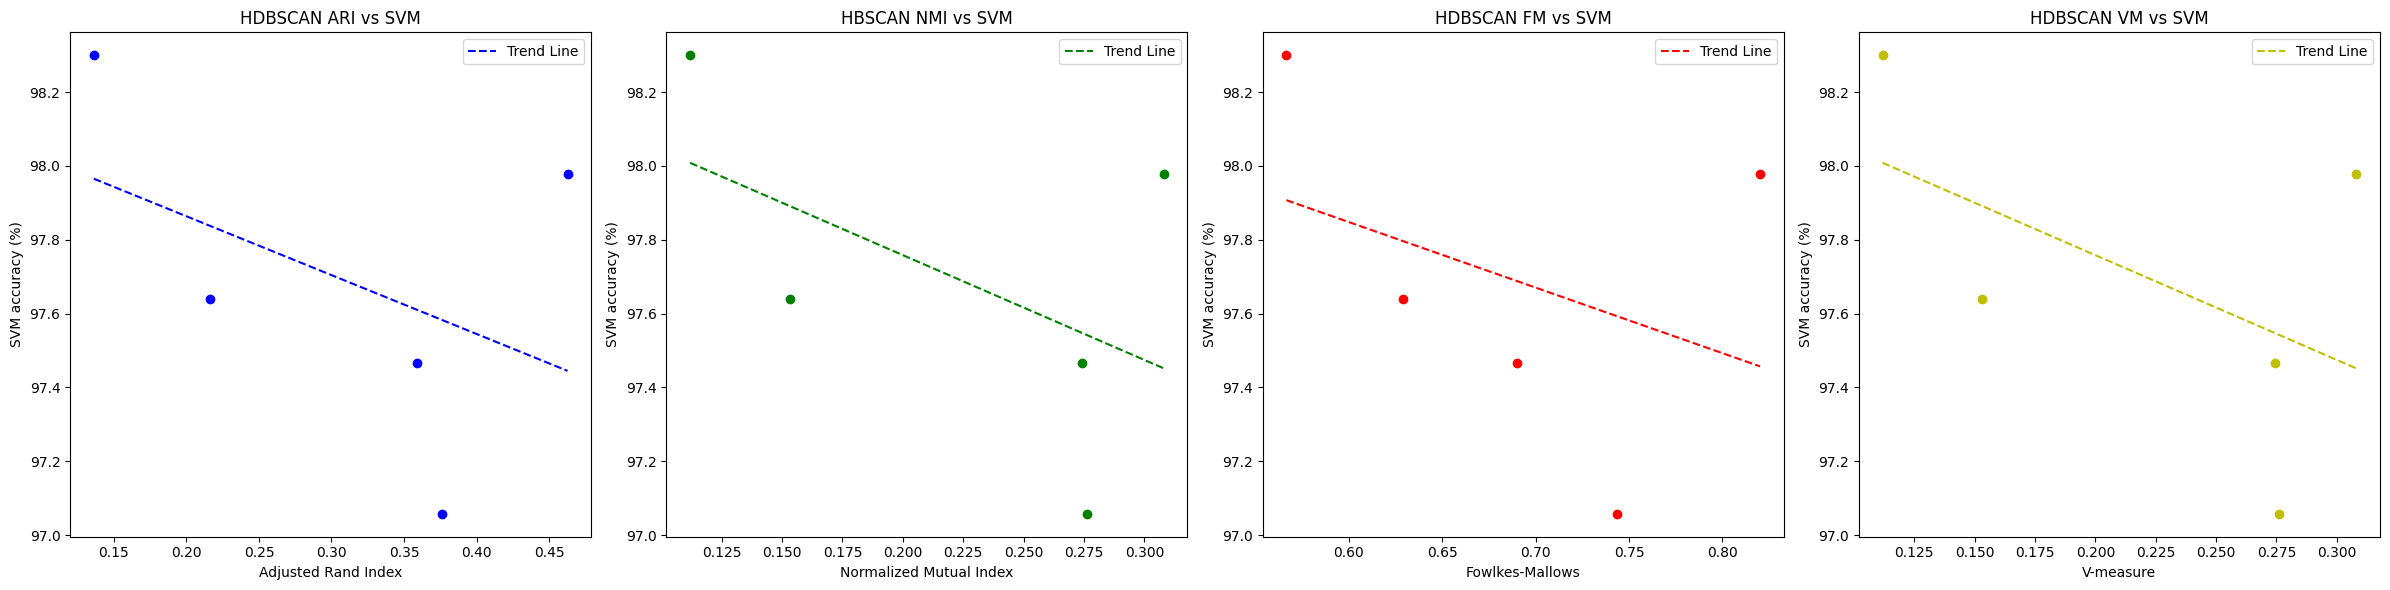

In [22]:
# HDB metrics
# Create scatter plots with trend lines
plt.figure(figsize=(24, 6))

# ARI vs SVM
plt.subplot(141)
plt.scatter(HDBSCANari_values, svm_values, c='b', marker='o')
plt.xlabel('Adjusted Rand Index')
plt.ylabel('SVM accuracy (%)')
plt.title('HDBSCAN ARI vs SVM')

HDBSCANari_fit = np.polyfit(HDBSCANari_values, svm_values, 1)
plt.plot(HDBSCANari_values, np.polyval(HDBSCANari_fit, HDBSCANari_values), 'b--', label='Trend Line')
plt.legend()

# nmi vs SVM
plt.subplot(142)
plt.scatter(HDBSCANnmi_values, svm_values, c='g', marker='o')
plt.xlabel('Normalized Mutual Index')
plt.ylabel('SVM accuracy (%)')
plt.title('HBSCAN NMI vs SVM')

HDBSCANnmi_fit = np.polyfit(HDBSCANnmi_values, svm_values, 1)
plt.plot(HDBSCANnmi_values, np.polyval(HDBSCANnmi_fit, HDBSCANnmi_values), 'g--', label='Trend Line')
plt.legend()

# HDBSCANfm vs SVM
plt.subplot(143)
plt.scatter(HDBSCANfm_values, svm_values, c='r', marker='o')
plt.xlabel('Fowlkes-Mallows')
plt.ylabel('SVM accuracy (%)')
plt.title('HDBSCAN FM vs SVM')

HDBSCANfm_fit = np.polyfit(HDBSCANfm_values, svm_values, 1)
plt.plot(HDBSCANfm_values, np.polyval(HDBSCANfm_fit, HDBSCANfm_values), 'r--', label='Trend Line')
plt.legend()

# HDBSCANvm vs SVM
plt.subplot(144)
plt.scatter(HDBSCANvm_values, svm_values, c='y', marker='o')
plt.xlabel('V-measure')
plt.ylabel('SVM accuracy (%)')
plt.title('HDBSCAN VM vs SVM')

HDBSCANvm_fit = np.polyfit(HDBSCANvm_values, svm_values, 1)
plt.plot(HDBSCANvm_values, np.polyval(HDBSCANvm_fit, HDBSCANvm_values), 'y--', label='Trend Line')
plt.legend()

plt.tight_layout()
plt.savefig('HDBSCAN_metrics', dpi=300)

plt.show()


#### KMEANS metrics

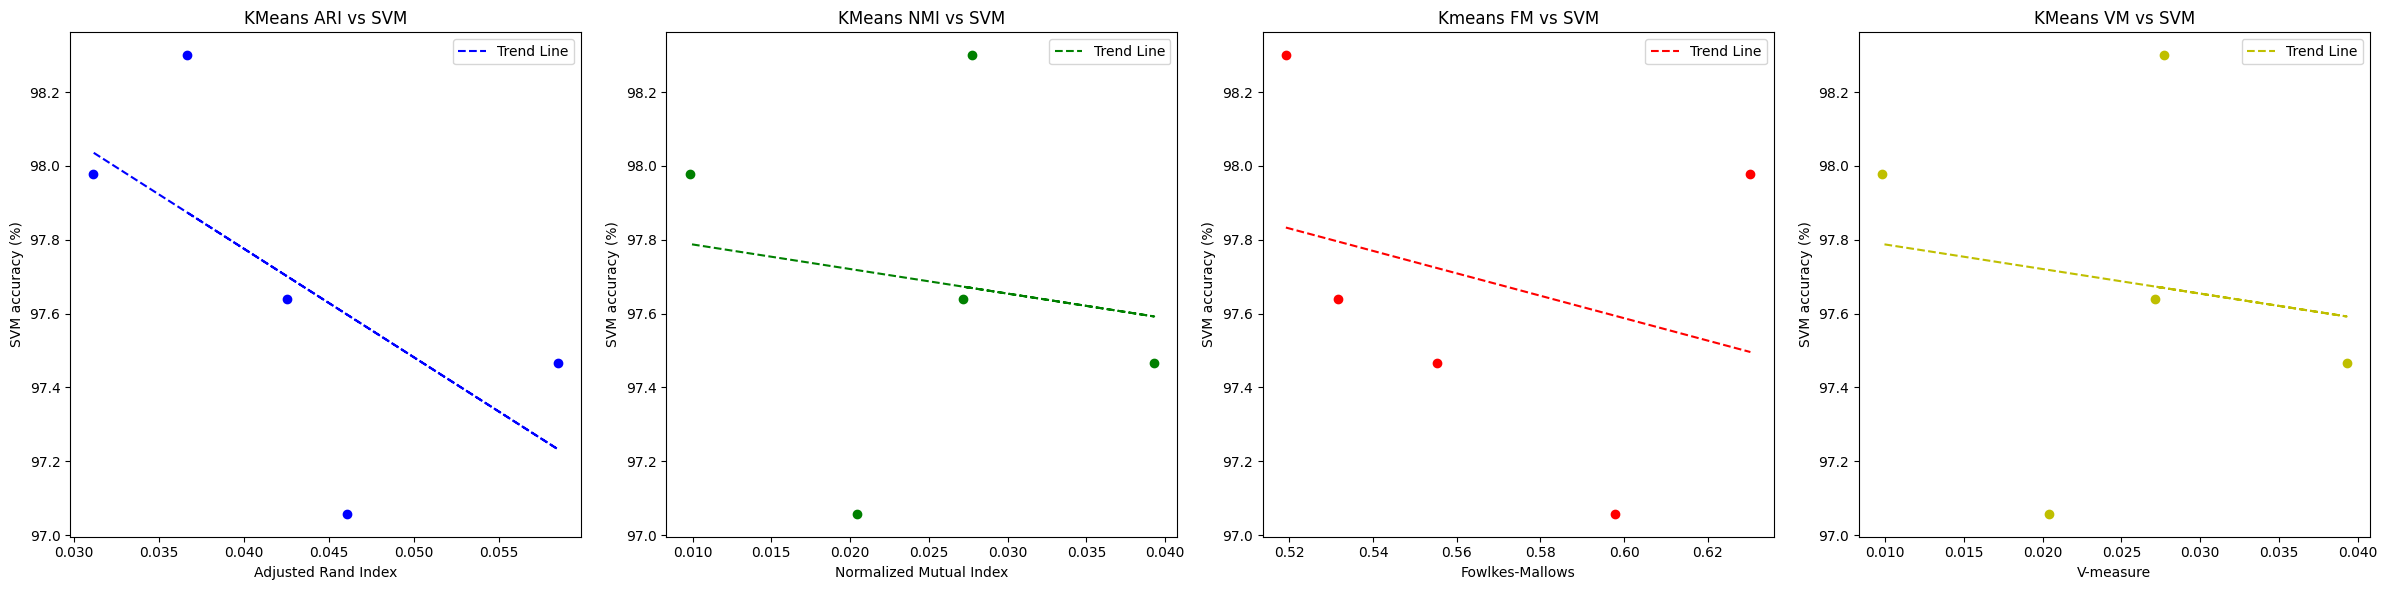

In [25]:
# Create scatter plots with trend lines
plt.figure(figsize=(24, 6))

# ARI vs SVM
plt.subplot(141)
plt.scatter(KMeansari_values, svm_values, c='b', marker='o')
plt.xlabel('Adjusted Rand Index')
plt.ylabel('SVM accuracy (%)')
plt.title('KMeans ARI vs SVM')

KMeansari_fit = np.polyfit(KMeansari_values, svm_values, 1)
plt.plot(KMeansari_values, np.polyval(KMeansari_fit, KMeansari_values), 'b--', label='Trend Line')
plt.legend()

# nmi vs SVM
plt.subplot(142)
plt.scatter(KMeansnmi_values, svm_values, c='g', marker='o')
plt.xlabel('Normalized Mutual Index')
plt.ylabel('SVM accuracy (%)')
plt.title('KMeans NMI vs SVM')

KMeansnmi_fit = np.polyfit(KMeansnmi_values, svm_values, 1)
plt.plot(KMeansnmi_values, np.polyval(KMeansnmi_fit, KMeansnmi_values), 'g--', label='Trend Line')
plt.legend()

# Kmeansfm vs SVM
plt.subplot(143)
plt.scatter(KMeansfm_values, svm_values, c='r', marker='o')
plt.xlabel('Fowlkes-Mallows')
plt.ylabel('SVM accuracy (%)')
plt.title('Kmeans FM vs SVM')

KMeansfm_fit = np.polyfit(KMeansfm_values, svm_values, 1)
plt.plot(KMeansfm_values, np.polyval(KMeansfm_fit, KMeansfm_values), 'r--', label='Trend Line')
plt.legend()

# Kmeansvm vs SVM
plt.subplot(144)
plt.scatter(KMeansvm_values, svm_values, c='y', marker='o')
plt.xlabel('V-measure')
plt.ylabel('SVM accuracy (%)')
plt.title('KMeans VM vs SVM')

KMeansvm_fit = np.polyfit(KMeansvm_values, svm_values, 1)
plt.plot(KMeansvm_values, np.polyval(KMeansvm_fit, KMeansvm_values), 'y--', label='Trend Line')
plt.legend()

plt.tight_layout()
plt.savefig('KMeans_metrics', dpi=300)

plt.show()


In [49]:
# Calculate DBSCAN correlation coefficients
correlation_HDBSCANari = np.corrcoef(HDBSCANari_values, svm_values)[0, 1]
correlation_HDBSCANnmi = np.corrcoef(HDBSCANnmi_values, svm_values)[0, 1]
correlation_HDBSCANfm = np.corrcoef(HDBSCANfm_values, svm_values)[0, 1]
correlation_HDBSCANvm = np.corrcoef(HDBSCANvm_values, svm_values)[0, 1]

print(f"Correlation DBSCAN vs ari: {correlation_HDBSCANari}")
print(f"Correlation DBSCAN vs nmi: {correlation_HDBSCANnmi}")
print(f"Correlation DBSCAN vs fm: {correlation_HDBSCANfm}")
print(f"Correlation DBSCAN vs vm: {correlation_HDBSCANvm}")


# Calculate KMeans correlation coefficients
correlation_KMeansari = np.corrcoef(KMeansari_values, svm_values)[0, 1]
correlation_KMeansnmi = np.corrcoef(KMeansnmi_values, svm_values)[0, 1]
correlation_KMeansfm = np.corrcoef(KMeansfm_values, svm_values)[0, 1]
correlation_KMeansvm = np.corrcoef(KMeansvm_values, svm_values)[0, 1]

print(f"CorrelationKMeans vs ari: {correlation_KMeansari}")
print(f"CorrelationKMeans vs nmi: {correlation_KMeansnmi}")
print(f"CorrelationKMeans vs fm: {correlation_KMeansfm}")
print(f"CorrelationKMeans vs vm: {correlation_KMeansvm}")


Correlation DBSCAN vs ari: -0.43978035845741337
Correlation DBSCAN vs nmi: -0.5154251884403692
Correlation DBSCAN vs fm: -0.3673001146392868
Correlation DBSCAN vs vm: -0.5154251884403694
CorrelationKMeans vs ari: -0.640153871274791
CorrelationKMeans vs nmi: -0.1512659798603295
CorrelationKMeans vs fm: -0.2962174790747745
CorrelationKMeans vs vm: -0.15126597986032916


### Mislabels experiment plots

Finally we generate plots. Only one value of plot is being displayed here, but code can be tweaked to plot any data we want

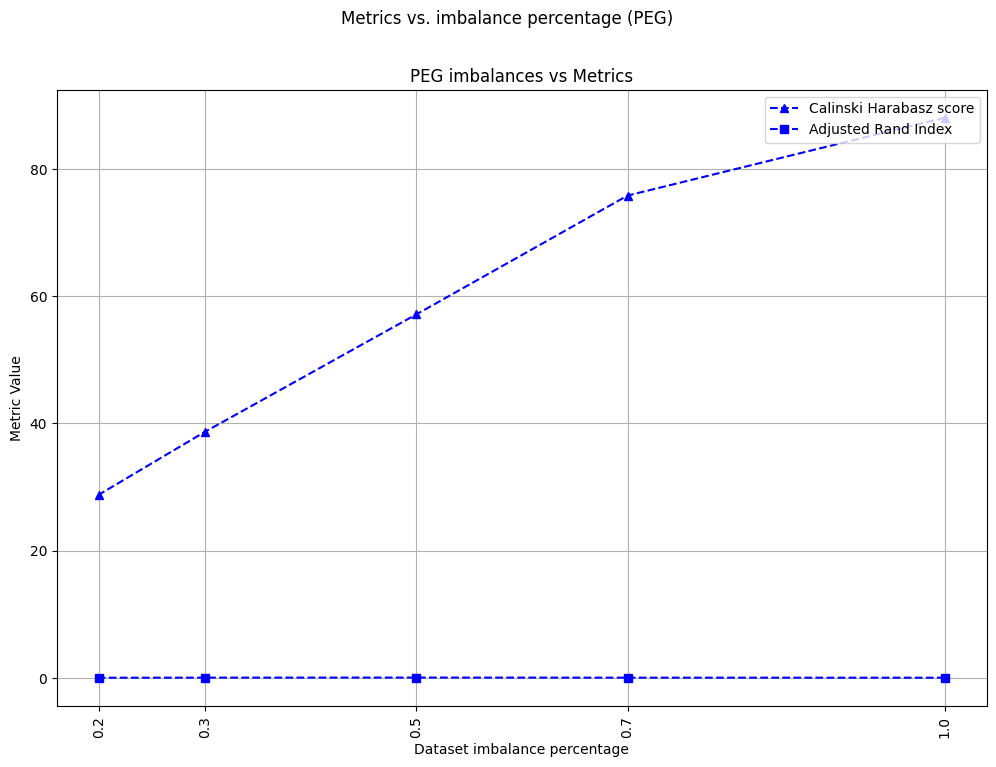

In [53]:
def imbalance_plotting( model='ML model', metric = 'SVM accuracy', save =False):
    # Sample data for ResNet and EfficientNet metrics
    imbalance_percentages =  [1, 0.7, 0.5, 0.3, 0.2]   # Add more percentages as needed
 
    # Create a figure and a set of axes
    # fig, ax1,  = plt.subplots(figsize=(12, 6))
    fig, axs = plt.subplots(1, 1, figsize=(12, 8))
    
    # Create the line chart on the primary y-axis (ax1)
    plt.title(f'PEG imbalances vs Metrics')
    

    # ax1.plot(mislabel_percentages, svm_values, marker='s', label='SVM accuracy', linestyle='-', color='blue')
    axs.plot(imbalance_percentages, ch_values, marker='^', label='Calinski Harabasz score', linestyle='--', color='blue')
    axs.plot(imbalance_percentages, KMeansari_values, marker='s', label='Adjusted Rand Index', linestyle='--', color='blue')

    # axs.plot(imbalance_percentages, silhouette_values, marker='o', label='Silhouette score', linestyle='--', color='green')
    # axs.plot(imbalance_percentages, KMeansari_values, marker='D', label='ARI values', linestyle='--', color='orange')
    # axs.plot(mislabel_percentages, d_values, marker='o', label='Davies Bouldin Index', linestyle='--', color='green')

    
    axs.set_xlabel('Dataset imbalance percentage')
    axs.set_ylabel(f'{metric}', color='black')
    axs.tick_params(axis='y', labelcolor='black')
    axs.legend(loc='upper right')
    axs.grid(True)
    axs.tick_params(axis='x', rotation=90)
    fig.suptitle('Metrics vs. imbalance percentage (PEG)')


    # Define the positions and labels for the additional xticks
    xtick_positions =  [1, 0.7, 0.5, 0.3, 0.2]    # List of xtick positions
    
    # Add the additional xticks
    axs.set_xticks(xtick_positions)
    
    
   
    if save:
        plt.savefig(f'CH_PEG_imbalance_graph.png',bbox_inches='tight', dpi=300)
    # Show the plot
    plt.show()
    


imbalance_plotting(metric = 'Metric Value', model = 'SVM', save = True)


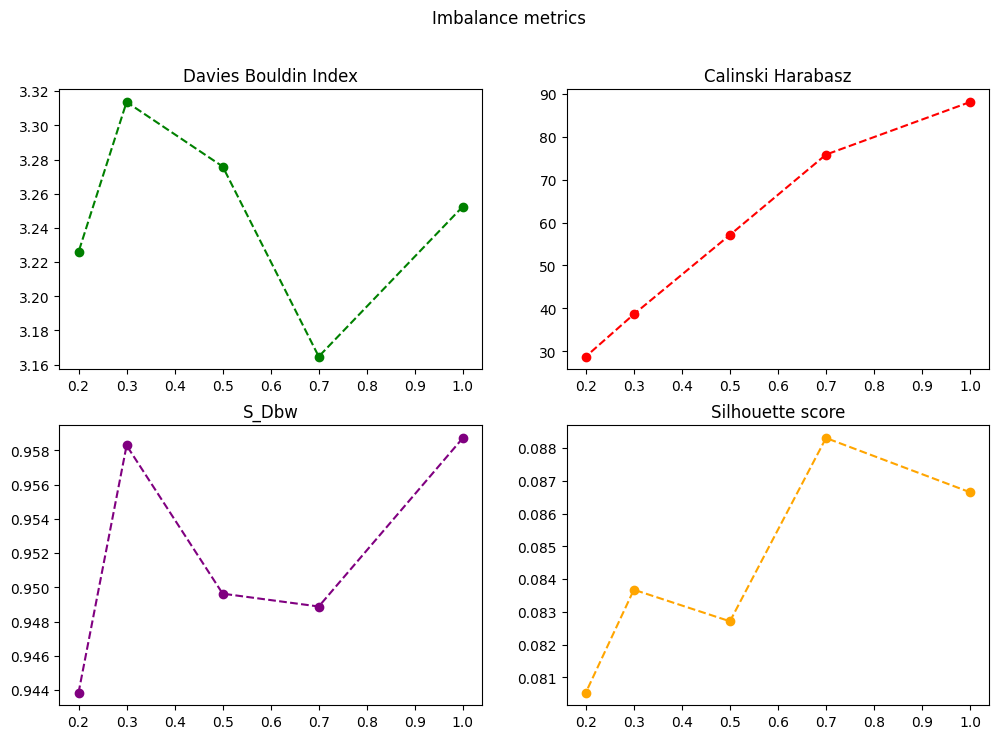

In [55]:
def imbalance_plot_2( model='ML model', metric = 'SVM accuracy', save =False):
    
  
    imbalance_percentages = [1, 0.7, 0.5, 0.3, 0.2]  # Add more percentages as needed

    # Create a figure and a set of axes
    # fig, ax1,  = plt.subplots(figsize=(12, 6))
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    
    # Create the line chart on the primary y-axis (ax1)
    plt.suptitle(f'{metric}')
    

    axs[0,0].plot(imbalance_percentages, dbi_values, marker='o', label='Davies Bouldin Index', linestyle='--', color='green')
    axs[0, 0].set_title('Davies Bouldin Index')
    
    axs[0,1].plot(imbalance_percentages, ch_values, marker='o', label='CH', linestyle='--', color='red')
    axs[0, 1].set_title('Calinski Harabasz')
    
    axs[1,1].plot(imbalance_percentages, sh_values, marker='o', label='Silhouette', linestyle='--', color='orange')
    axs[1, 1].set_title('Silhouette score')
    
    axs[1,0].plot(imbalance_percentages, sdbw_values, marker='o', label='S_Dbw', linestyle='--', color='purple')
    axs[1, 0].set_title('S_Dbw')




    # Define the positions and labels for the additional xticks
    xtick_positions = [1, 0.7, 0.5, 0.3, 0.2]  # List of xtick positions
   
    if save:
        plt.savefig(f'{metric}_mislabels_graph.png',bbox_inches='tight', dpi=300)
    # Show the plot
    plt.show()
    

imbalance_plot_2(metric = 'Imbalance metrics', model = 'SVM', save = True)
